Import needed information 

In [1]:
import mne, os, glob
from mne.io import read_raw_brainvision, read_epochs_eeglab
import scipy

Get the files

In [2]:
files = []
for each in glob.glob("/home/user/Desktop/setFiles/subj01/Still/*.set"): 
    files.append(each)

In [3]:
data = read_epochs_eeglab(files[1])

Extracting parameters from /home/user/Desktop/setFiles/subj01/Still/human_still_epochs.set...
86 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.


<ipython-input-3-113cef940b3a>:1: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = read_epochs_eeglab(files[1])
<ipython-input-3-113cef940b3a>:1: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: ['pulse', 'GSR']. Their position has been left untouched.
  data = read_epochs_eeglab(files[1])


In [4]:
data.save("data.m")

Overwriting existing file.


<ipython-input-4-e1eaccef3435>:1: RuntimeWarning: This filename (data.m) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  data.save("data.m")
<ipython-input-4-e1eaccef3435>:1: DeprecationWarning: overwrite defaults to True in 0.18 but will change to False in 0.19, set it explicitly to avoid this warning
  data.save("data.m")


In [5]:
data = data.drop_channels(['pulse','GSR'])

In [6]:
fig = data.plot_image()

86 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


<Figure size 640x480 with 3 Axes>

In [7]:
data.apply_baseline()

Applying baseline correction (mode: mean)


<EpochsEEGLAB  |   86 events (all good), -0.2 - 0.598 sec, baseline [None, 0], ~16.4 MB, data loaded,
 'S  2/S 72': 5
 'S  2/S 73': 7
 'S  2/S 74': 4
 'S  2/S 75': 2
 'S  2/S 76': 4
 'S  2/S 77': 6
 'S  2/S 78': 8
 'S 72': 4
 'S 73': 8
 'S 74': 9
 'S 75': 10
 'S 76': 8
 'S 77': 6
 'S 78': 5>

    Using multitaper spectrum estimation with 7 DPSS windows


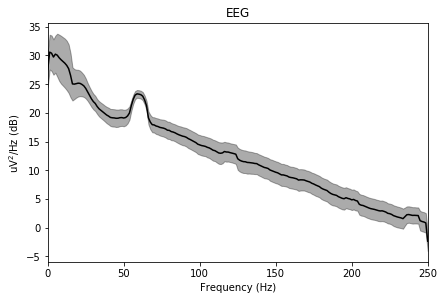

In [8]:
plot = data.plot_psd()

    Using multitaper spectrum estimation with 7 DPSS windows


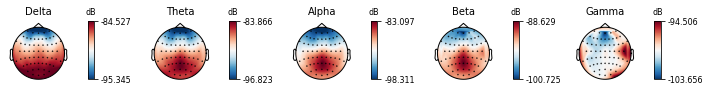

In [9]:
topomap = data.plot_psd_topomap()

In [12]:
data

<EpochsEEGLAB  |   86 events (all good), -0.2 - 0.598 sec, baseline [None, 0], ~16.4 MB, data loaded,
 'S  2/S 72': 5
 'S  2/S 73': 7
 'S  2/S 74': 4
 'S  2/S 75': 2
 'S  2/S 76': 4
 'S  2/S 77': 6
 'S  2/S 78': 8
 'S 72': 4
 'S 73': 8
 'S 74': 9
 'S 75': 10
 'S 76': 8
 'S 77': 6
 'S 78': 5>

In [13]:
scipy.io.savemat("data.mat", {"subj01_human_still": data})

TypeError: Could not convert None (type <class 'NoneType'>) to array